<a href="https://colab.research.google.com/github/peri0701/Bauklotz-Objekterkennungsmodell/blob/main/Yolov8s_Bauklotz_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

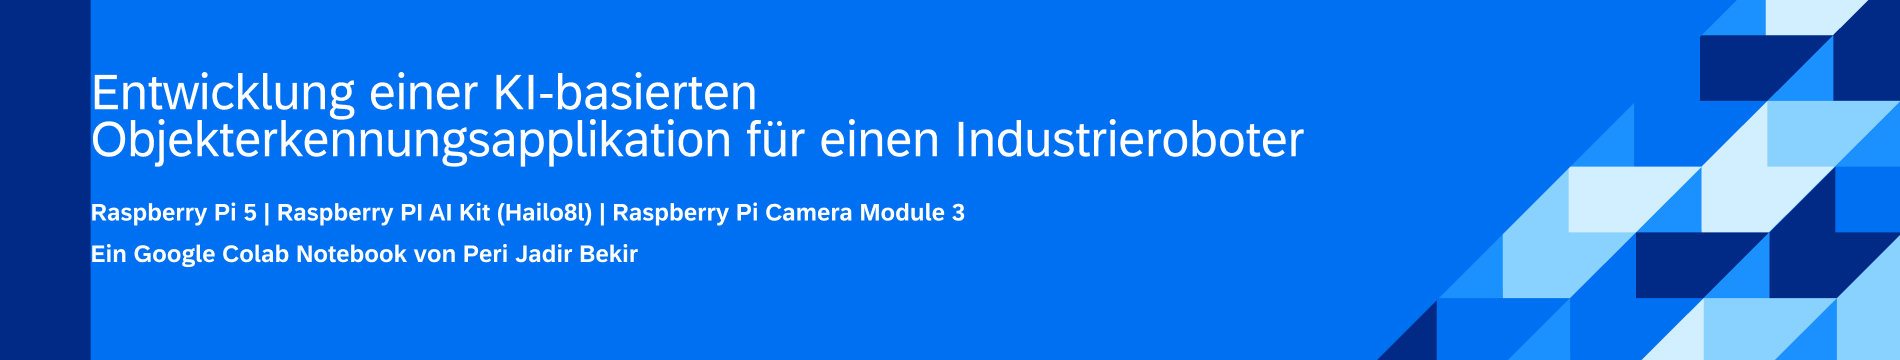

# How to Train YOLOv8 Object Detection on a Custom Dataset

---


[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.


## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Dec 26 02:54:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Hier noch ein Verweis. dass wir das ganze mit unserem Rechner Homezone verbinden müssebn

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
%cd {HOME}

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yr0FpGRfID8b2xG8cyqt")
project = rf.workspace("bauklotz").project("bauklotz-c8zsq")
version = project.version(1)
dataset = version.download("yolov8")

/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bauklotz-1 in yolov8:: 100%|██████████| 2472/2472 [00:00<00:00, 6559.34it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/bauklotz-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

Der Ordner runs.zip hat viele verborgene Schätze, weshalb es sich lohnt den ganzen Ordner einmal herunterzuladen (best.pt) ist ebenfalls im Ordner zu finden, sowie die Graphen und viele andere Goodies.

In [ ]:
!zip -r runs.zip runs/
from google.colab import files
files.download('runs.zip')


updating: runs/ (stored 0%)
updating: runs/detect/ (stored 0%)
updating: runs/detect/train/ (stored 0%)
updating: runs/detect/train/args.yaml (deflated 53%)
updating: runs/detect/train/val_batch1_pred.jpg (deflated 9%)
updating: runs/detect/train/labels_correlogram.jpg (deflated 42%)
updating: runs/detect/train/events.out.tfevents.1735181872.6fc29359449b.1442.0 (deflated 87%)
updating: runs/detect/train/PR_curve.png (deflated 30%)
updating: runs/detect/train/results.csv (deflated 86%)
updating: runs/detect/train/R_curve.png (deflated 20%)
updating: runs/detect/train/train_batch1.jpg (deflated 3%)
updating: runs/detect/train/labels.jpg (deflated 37%)
updating: runs/detect/train/results.png (deflated 9%)
updating: runs/detect/train/P_curve.png (deflated 27%)
updating: runs/detect/train/weights/ (stored 0%)
updating: runs/detect/train/weights/last.pt (deflated 8%)
updating: runs/detect/train/weights/best.pt (deflated 8%)
updating: runs/detect/train/val_batch0_labels.jpg (deflated 9%)
upda

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

from google.colab import files
files.download('runs/detect/train2/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Pytorch Modell in ONNX Format überführen**

Dieser Schritt ist notwendig, da die Überführung später in eine HEF File, nur mit dem ONNX durchführbar ist.

In [ ]:
from ultralytics import YOLO

# YOLO-Modell laden
model = YOLO('runs/detect/train2/weights/best.pt')

# Exportieren nach ONNX
model.export(format="onnx")


Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 2.0s, saved as 'runs/detect/train2/weights/best.onnx' (42.7 MB)

Export complete (3.9s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.onnx imgsz=640 data=/content/bauklotz-1/data.yaml  
Visualize:       https://netron.app


'runs/detect/train2/weights/best.onnx'

In [ ]:

from google.colab import files
files.download('runs/detect/train2/weights/best.onnx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hier können die Ergebnisse deines Modells betrachtet werden.  

/content


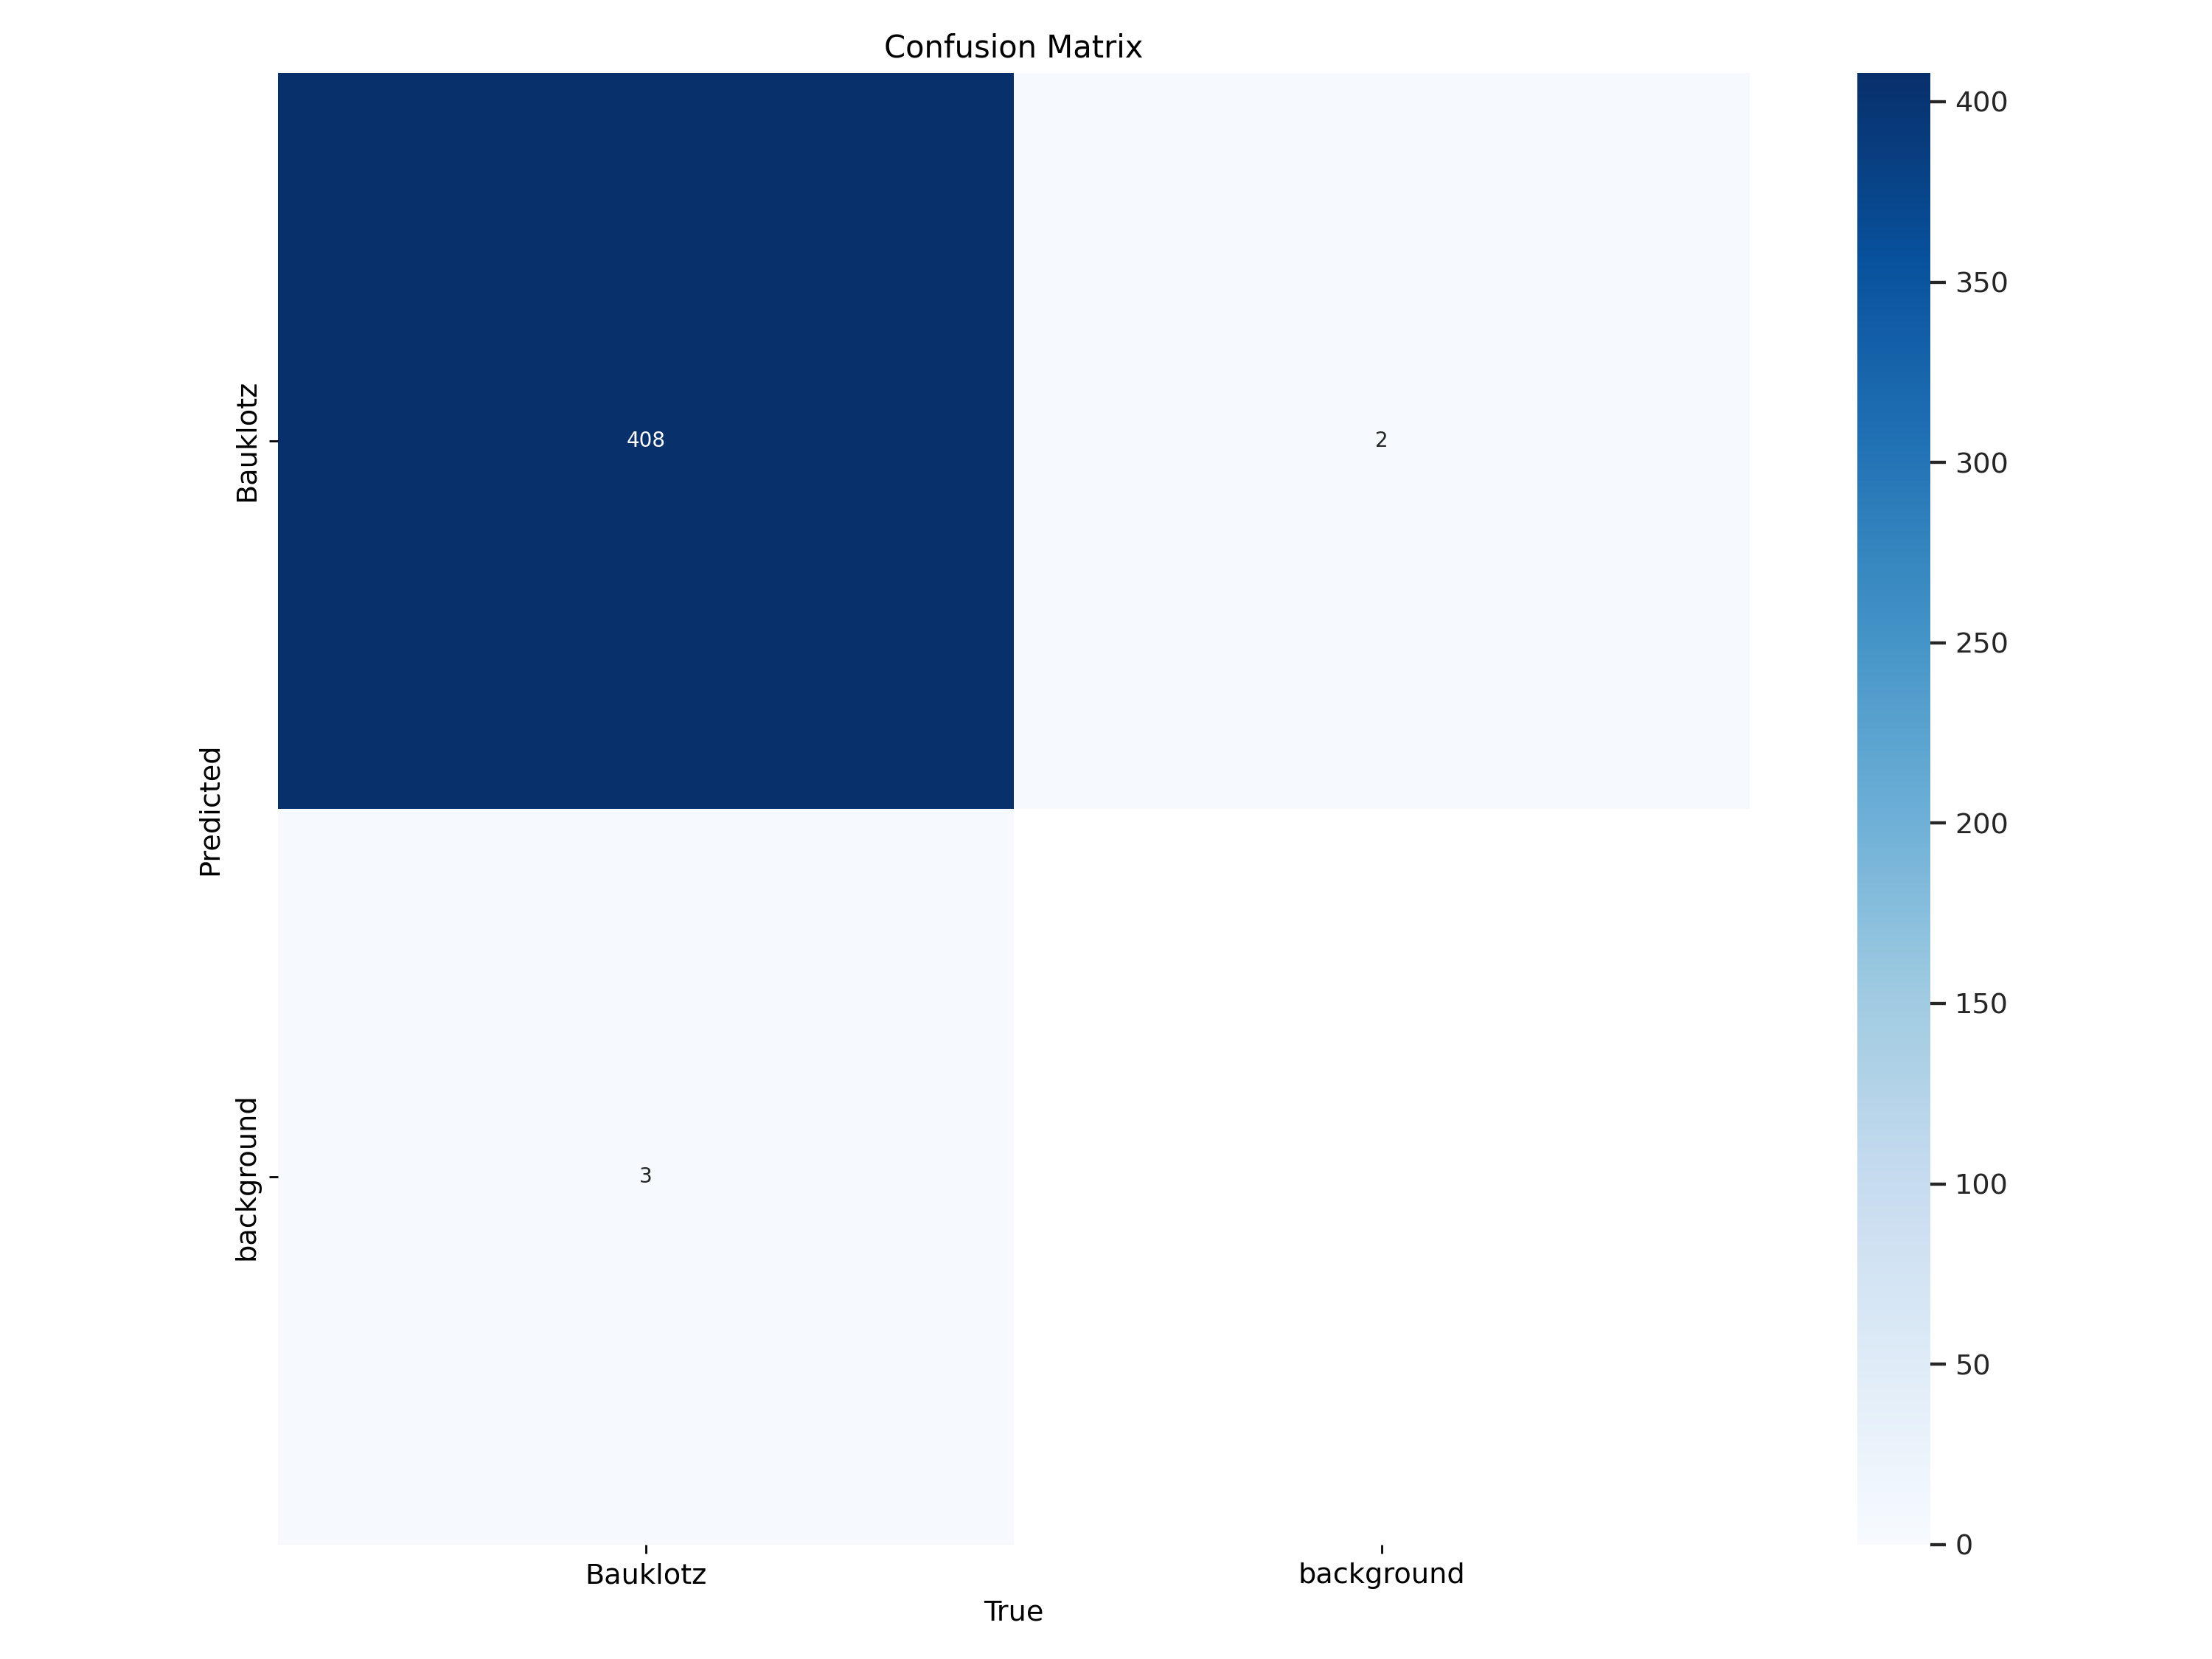

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=640)

/content


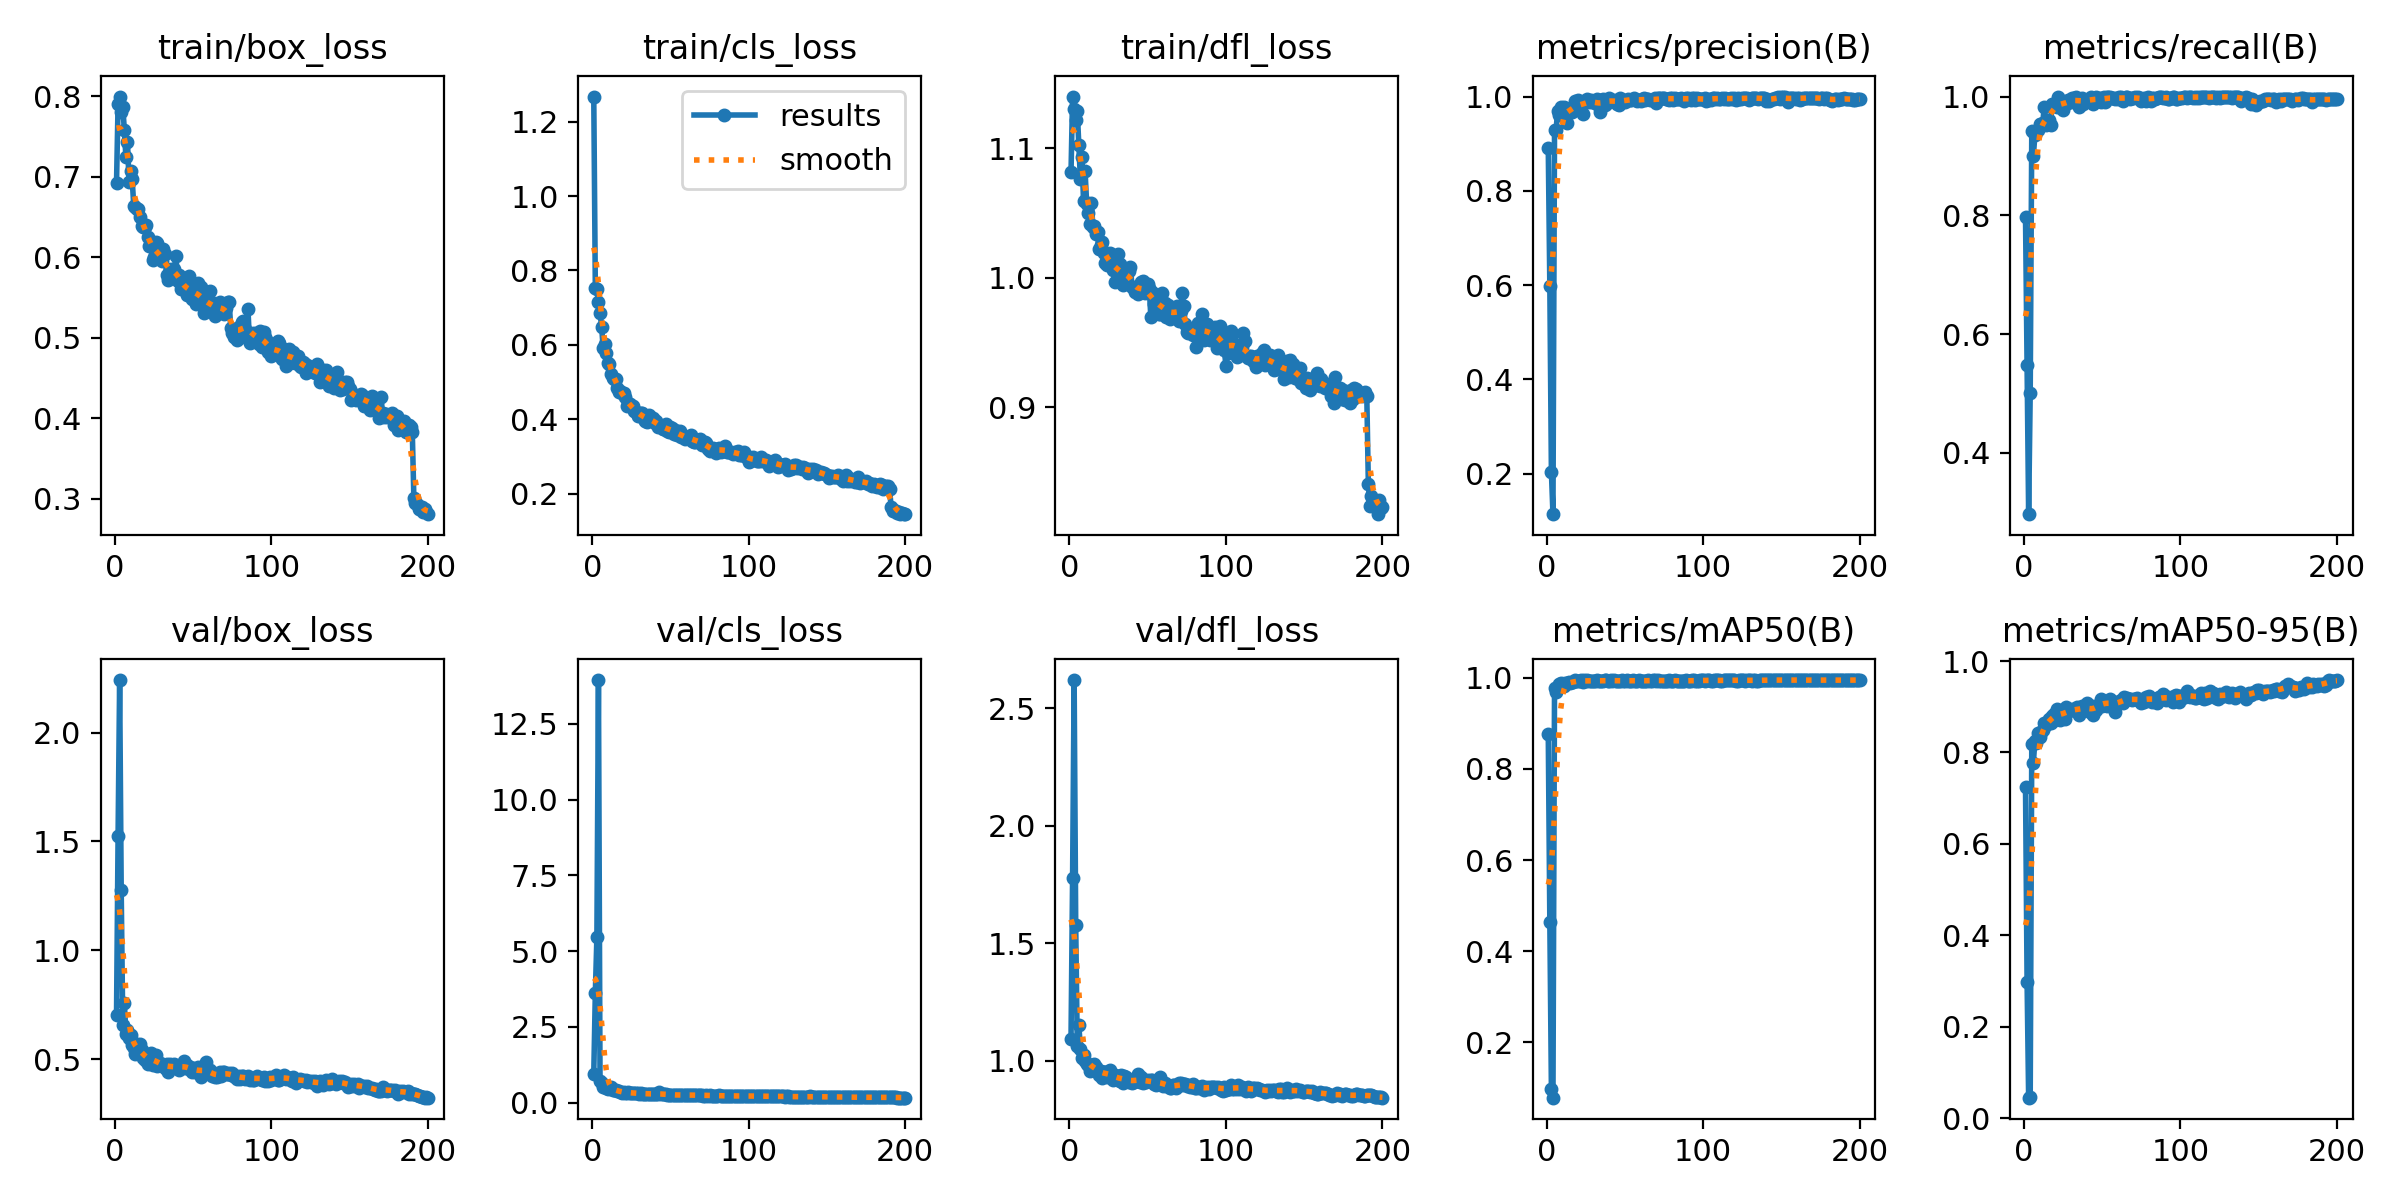

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=640)

/content


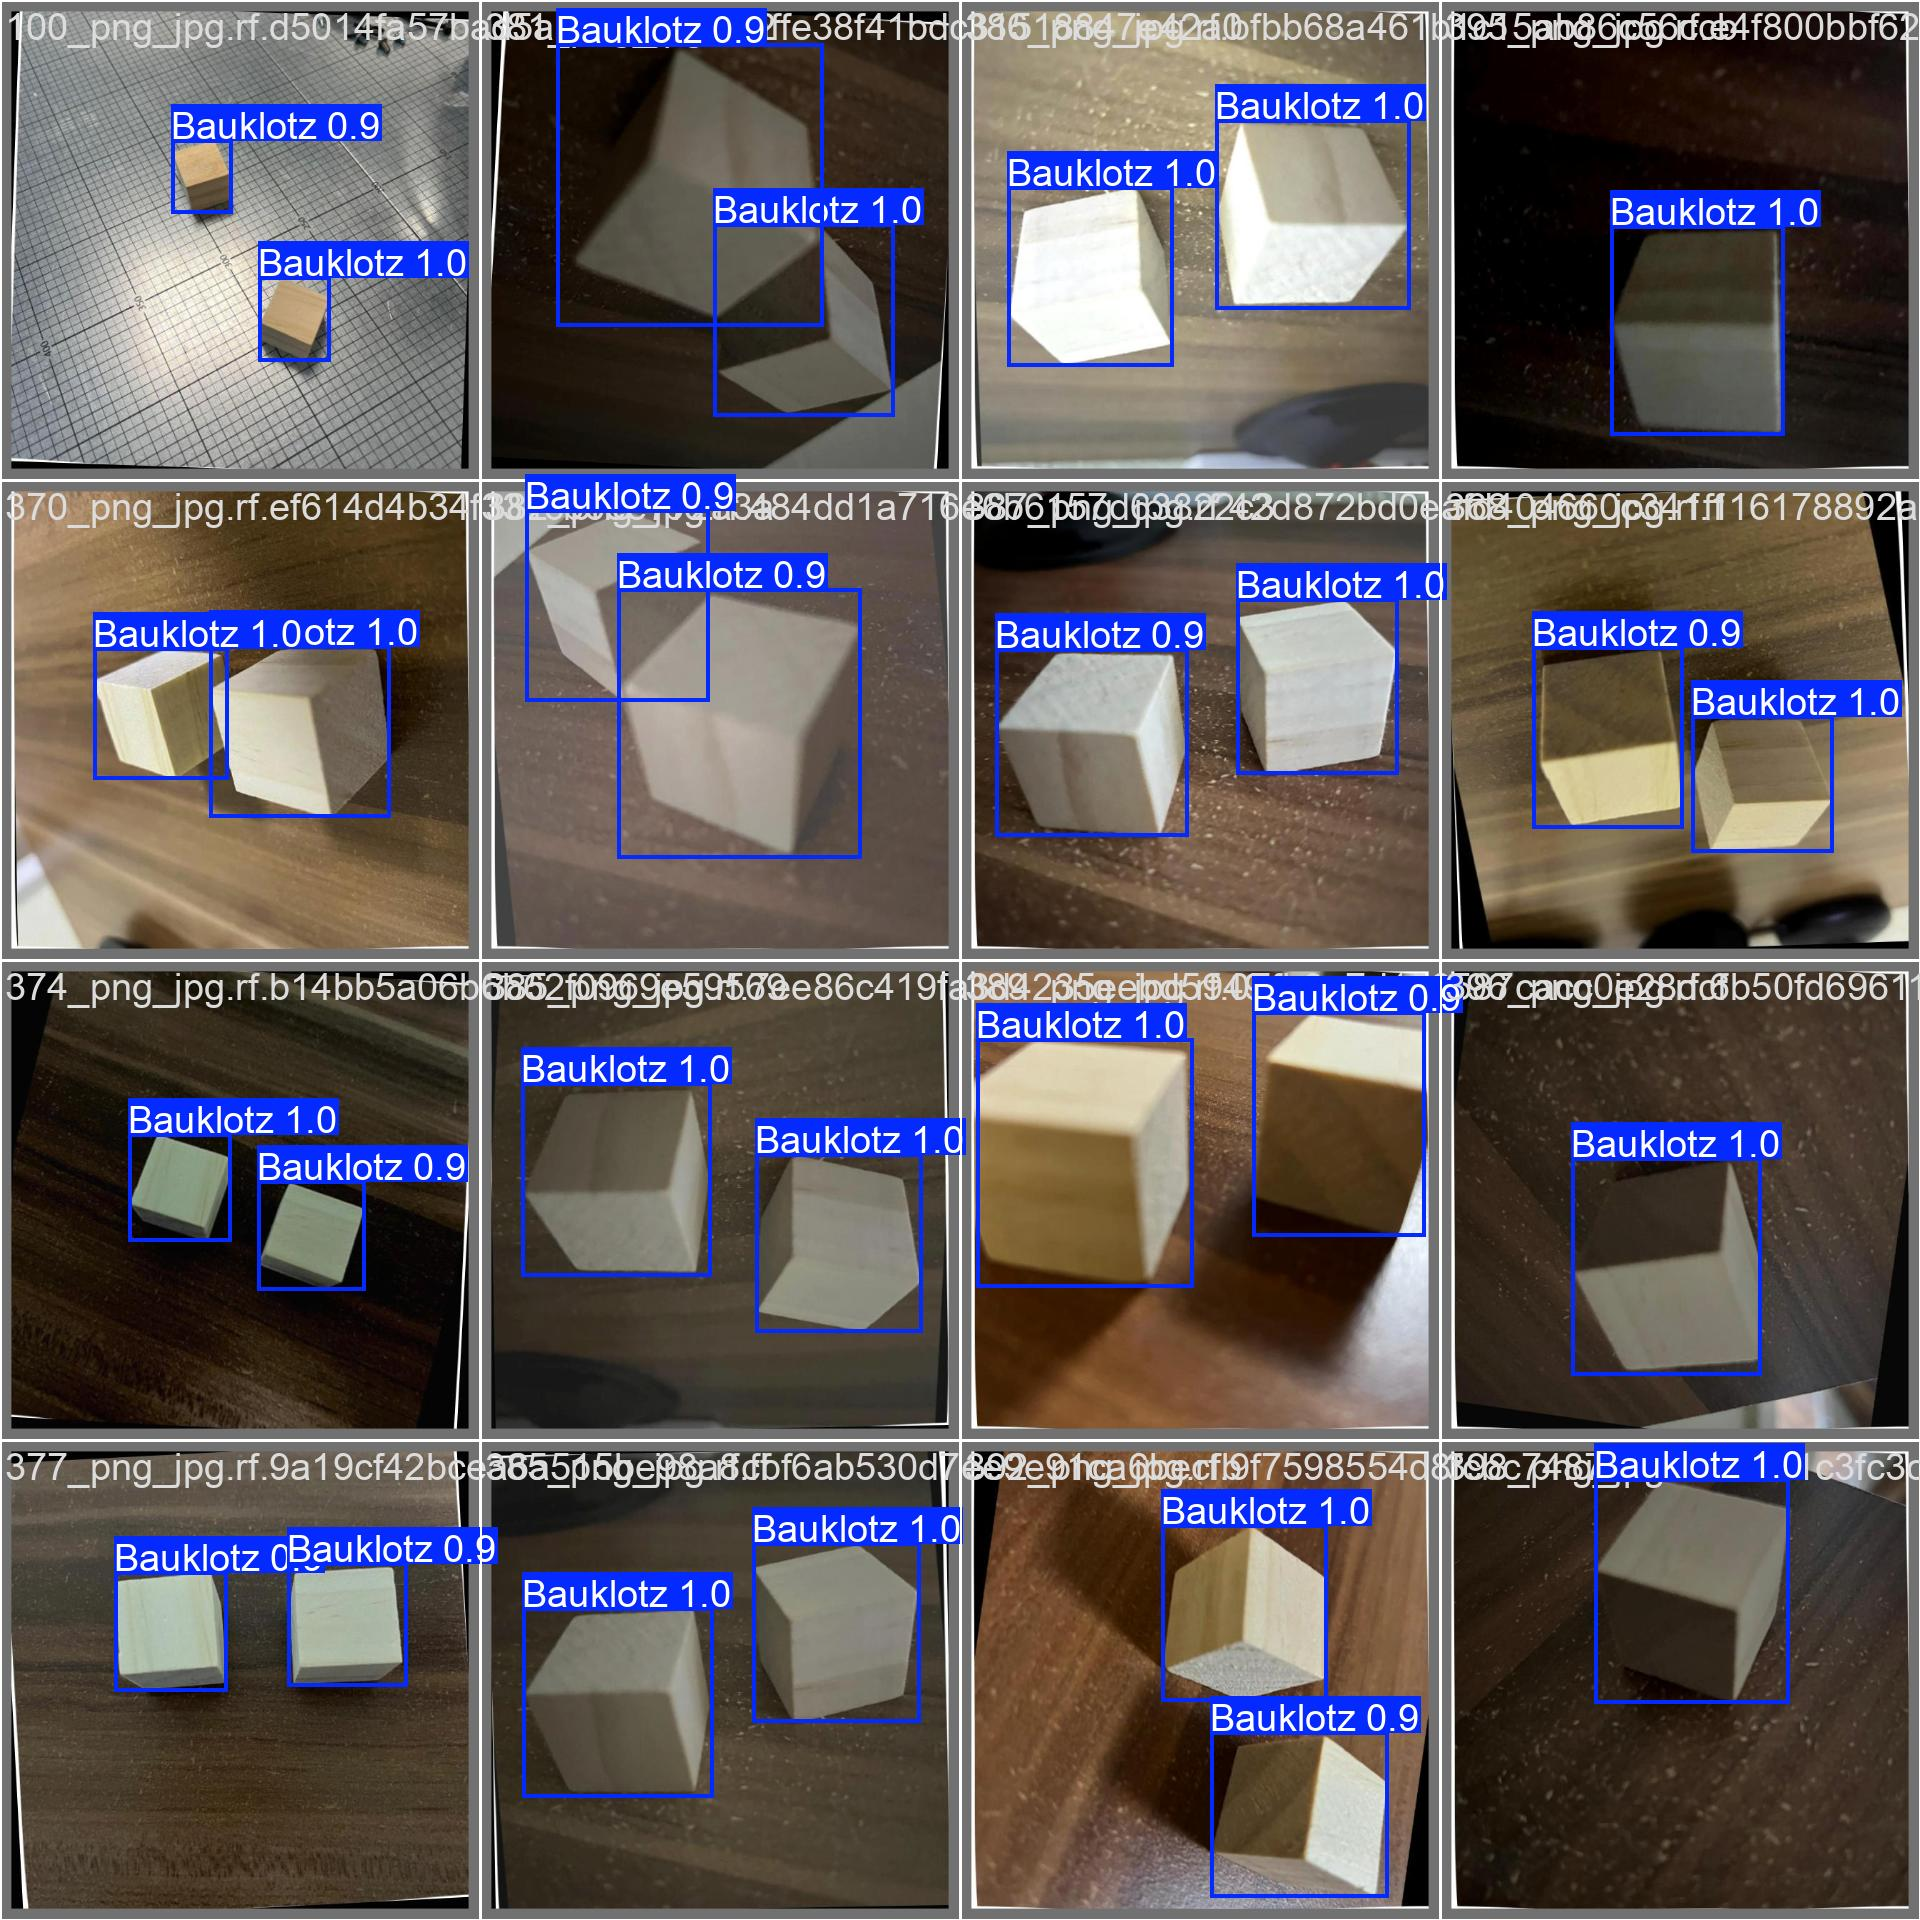

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/bauklotz-1/valid/labels.cache... 246 images, 0 backgrounds, 0 corrupt: 100% 246/246 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [02:53<00:00, 10.87s/it]
                   all        246        411      0.995      0.995      0.995       0.96
Speed: 5.2ms preprocess, 694.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/123 /content/bauklotz-1/test/images/102_png_jpg.rf.637b3afd2ff537e05af366cbfa905a5b.jpg: 640x640 2 Bauklotzs, 487.2ms
image 2/123 /content/bauklotz-1/test/images/102_png_jpg.rf.83f3b7324952bbf92d0b0466078d938b.jpg: 640x640 2 Bauklotzs, 459.1ms
image 3/123 /content/bauklotz-1/test/images/102_png_jpg.rf.b247c1afbec3ff5fe253908a41891c77.jpg: 640x640 2 Bauklotzs, 510.9ms
image 4/123 /content/bauklotz-1/test/images/103_png_jpg.rf.dc888caf46bdc6e27d3520a1f5ed37f6.jpg: 640x640 2 Bauklotzs, 487.1ms
image 5/123 /content/bauklotz-1/test/images/109_png_jpg.rf.4d271396ea6401c7071fba36d19f5427.jpg: 640x640 2 Bauklotzs, 468.6ms
image 6/123 /content/bauklotz-1/test/images/10_jpg.rf.0092fa0d3235f9f8bc25283d98ac815e.jpg: 640x640 1 Bauklotz, 467.1ms
image 7/123 /content/bauklotz-1/test/images/114_png_jpg.rf.9338a1a26e504

**NOTE:** Let's take a look at few results.

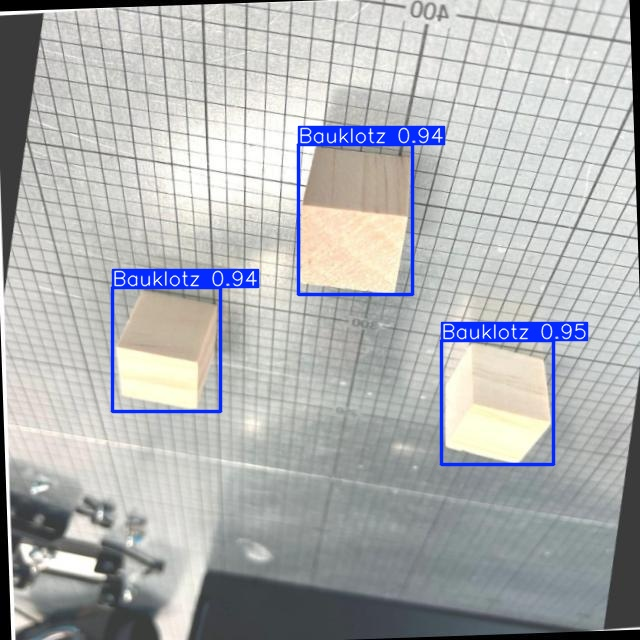

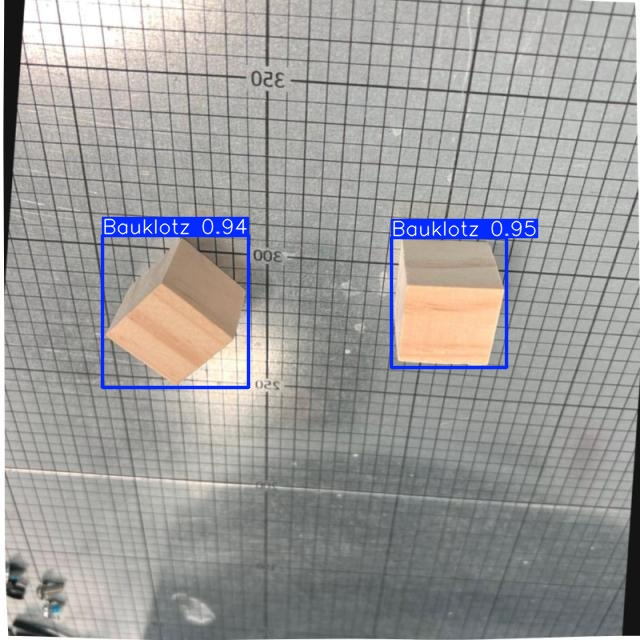

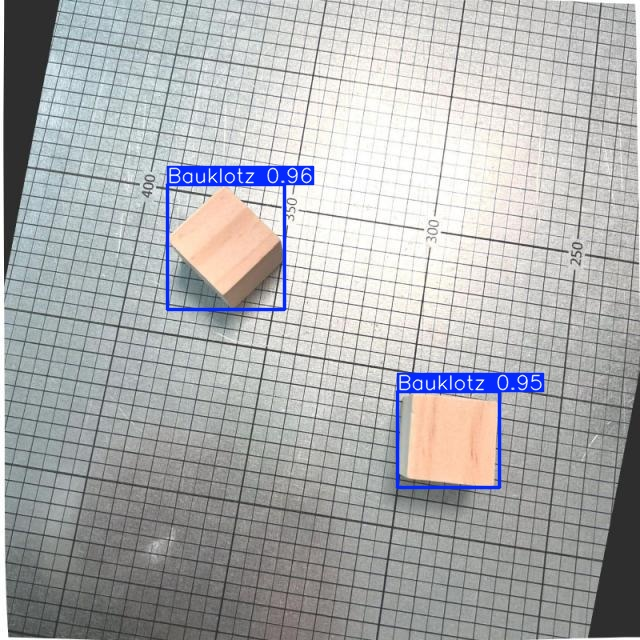

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## 🏆 Congratulations
